Tensor Flow Digit Recognizer
=============
https://www.kaggle.com/c/digit-recognizer/data
This dataset is designed to look like the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset.

In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import os
import tarfile
import urllib
import tensorflow as tf
from IPython.display import display, Image, HTML
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
import cPickle as pickle
%matplotlib inline

Loading data, Image as array
----------------
http://docs.scipy.org/doc/scipy/reference/ndimage.html

In [7]:
# Load the MNIST data
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [8]:
print train.shape
print test.shape

(42000, 785)
(28000, 784)


In [99]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


http://matplotlib.org/users/image_tutorial.html

In [188]:
## look at mpimg reading of file
import matplotlib.image as mpimg
print mpimg.imread(myimg)[27,:]
print ((mpimg.imread(myimg).astype(float) - pixel_depth / 2) / pixel_depth)[27,:]

[ 1.          1.          0.99607843  1.          1.          0.99215686
  1.          0.95294118  0.03137255  0.          0.00392157  0.          0.
  0.          0.          0.          0.          0.01176471  0.
  0.30980393  1.          1.          1.          1.          1.
  0.99607843  1.          1.        ]
[-0.49607843 -0.49607843 -0.49609381 -0.49607843 -0.49607843 -0.49610919
 -0.49607843 -0.49626298 -0.49987697 -0.5        -0.49998462 -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.49995386 -0.5
 -0.49878508 -0.49607843 -0.49607843 -0.49607843 -0.49607843 -0.49607843
 -0.49609381 -0.49607843 -0.49607843]


7


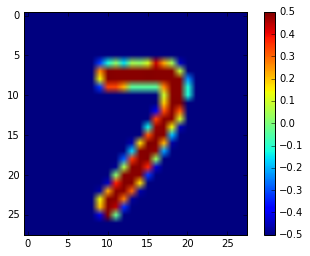

In [181]:
pixel_depth = 255.
look_at = int(random.random()*len(train))
myimg = (train.iloc[look_at,1:].values.astype(float) - pixel_depth/2) / pixel_depth
print train.iloc[look_at,0]
plt.imshow(myimg.reshape((28,28)))
plt.colorbar()
plt.show()

Training and Validation sets
------------------------------


In [105]:
y = train.iloc[:,0].values
y[:9]

array([1, 0, 1, 4, 0, 0, 7, 3, 5])

In [120]:
## variable for new label vectors
y_vec = np.zeros([y.shape[0], 10])
print y_vec.shape

(42000, 10)


In [123]:
## assign 1 to each index
y_vec[[np.arange(len(y)), y]] = 1
print y_vec.shape
print y[:9]
print y_vec[:9]
print y_vec.dtype

(42000, 10)
[1 0 1 4 0 0 7 3 5]
[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]]
float64


In [190]:
X = (train.iloc[:,1:].values.astype(float) - pixel_depth/2) / pixel_depth
X[0][100:200]

array([-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       ,  0.2372549 ,  0.5       , -0.13137255,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       ,  0.24901961,
        0.48039216,  0.49215686, -0.13529412, -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5 

In [292]:
Xtest = (test.values.astype(float) - pixel_depth/2) / pixel_depth
Xtest[0][100:200]

array([-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.46078431, -0.43333333, -0.43333333,
       -0.43333333, -0.43333333, -0.18235294,  0.20588235,  0.20588235,
       -0.3627451 , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        0.04509804,  0.49215686,  0.49215686,  0.49215686,  0.49215686,
        0.49215686,  0.49215686,  0.49215686, -0.31176471, -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5 

In [303]:
from sklearn import cross_validation

## split into train and validation
train_dataset, valid_dataset, train_labels, valid_labels = cross_validation.train_test_split(X, y, \
                                                                       test_size=.05, random_state=2916)

In [193]:
print train_dataset.shape
print train_labels.shape

(39900, 784)
(39900,)


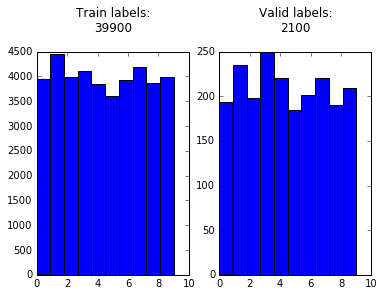

In [304]:
## look at histogram of class labels

fig = plt.figure()
a=fig.add_subplot(1,2,1)
plt.hist(train_labels)
title = 'Train labels:\n{}\n'.format(len(train_labels))
a.set_title(title)

a=fig.add_subplot(1,2,2)
plt.hist(valid_labels)
title = 'Valid labels:\n{}\n'.format(len(valid_labels))
a.set_title(title)

plt.show()

Save the data for later reuse
---------------------------

In [359]:
pickle_file = 'MNIST.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print 'Unable to save data to', pickle_file, ':', e
  raise

In [ ]:
statinfo = os.stat(pickle_file)
print 'Compressed pickle size:', statinfo.st_size

Load pickled data
-------------
http://deeplearning.net/software/theano/tutorial/loading_and_saving.html

In [68]:
pickle_file = 'MNIST.pickle'

f = open(pickle_file, 'rb')
loaded_obj = pickle.load(f)
f.close()

In [69]:
loaded_obj.keys()

['train_labels',
 'valid_labels',
 'test_labels',
 'test_dataset',
 'train_dataset',
 'valid_dataset']

In [70]:
for key,val in loaded_obj.items():
    exec(key + '=val')

print 'Training set', train_dataset.shape, train_labels.shape
print 'Validation set', valid_dataset.shape, valid_labels.shape
print 'Test set', test_dataset.shape

Training set (190550, 28, 28) (190550,)
Validation set (6000, 28, 28) (6000,)
Test set (18238, 28, 28) (18238,)


In [71]:
del(loaded_obj)  # hint to help gc free up memory

Tensor Flow CNN
---------------

In [762]:
## split into train and validation
train_dataset, valid_dataset, train_labels, valid_labels = cross_validation.train_test_split(X, y, \
                                                                       test_size=.025, random_state=71511)

In [629]:
image_size = 28
num_labels = 10
num_channels = 1 # grayscale

def reformat(dataset, labels):
  dataset = dataset.reshape(
    (-1, image_size, image_size, num_channels)).astype(np.float32)  # reshape as 28x28
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)  # convert label to vector
  return dataset, labels

In [763]:
# reformat the data
# use all training data
train_dataset, train_labels = X, y


train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, _ = reformat(Xtest, y)
print 'Training set', train_dataset.shape, train_labels.shape
print 'Validation set', valid_dataset.shape, valid_labels.shape
print 'Test set', test_dataset.shape, _.shape

Training set (42000, 28, 28, 1) (42000, 10)
Validation set (1050, 28, 28, 1) (1050, 10)
Test set (28000, 28, 28, 1) (42000, 10)


In [162]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [747]:
## Weight Initialization
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.01)
  return tf.Variable(initial)

def bias_variable(shape, constant=0.):
  initial = tf.constant(constant, shape=shape)
  return tf.Variable(initial)

In [164]:
## Convolution and Pooling
def conv2d(x, W, padding='SAME'):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding=padding)

def max_pool_2x2(x, padding='SAME'):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding=padding)

** 1. Build the graph**

In [802]:
batch_size = 32
patch_size = 5
depth = 32
depth2 = 96
num_hidden = 1024
#num_hidden2 = 300
#num_hidden3 = 50

graph = tf.Graph()

with graph.as_default():

  # Input data.
  tf_train_dataset = tf.placeholder(
    tf.float32, shape=(batch_size, image_size, image_size, num_channels))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  layer1_weights = weight_variable([patch_size, patch_size, num_channels, depth])
  layer1_biases = bias_variable([depth])
  layer2_weights = weight_variable([patch_size, patch_size, depth, depth2])
  layer2_biases = bias_variable([depth2])

  ## fc layer
  layer3_weights = weight_variable([((image_size)/4)**2 * depth2, num_hidden])
  layer3_biases = bias_variable([num_hidden])
  ## fc2 layer
  #layer4_weights = weight_variable([num_hidden, num_hidden2])
  #layer4_biases = bias_variable([num_hidden2])
  ## fc3 layer
  #layer5_weights = weight_variable([num_hidden2, num_hidden3])
  #layer5_biases = bias_variable([num_hidden3])

  ## readout layer
  layer6_weights = weight_variable([num_hidden, num_labels])
  layer6_biases = bias_variable([num_labels])

  ## Dropout
  #keep_prob = tf.placeholder(tf.float32)
  
  # Model.
  def model(data):
    conv = tf.nn.conv2d(data, layer1_weights, [1, 1, 1, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer1_biases)
    hidden = max_pool_2x2(hidden)
    conv = conv2d(hidden, layer2_weights, padding='SAME')
    hidden = tf.nn.relu(conv + layer2_biases)
    hidden = max_pool_2x2(hidden)
    shape = hidden.get_shape().as_list()
    print shape
    reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])
    print reshape.get_shape().as_list()
    hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
    #hidden = tf.nn.dropout(hidden, 0.5)
    #hidden = tf.nn.relu(tf.matmul(hidden, layer4_weights) + layer4_biases)
    #hidden = tf.nn.dropout(hidden, 0.5)
    #hidden = tf.nn.relu(tf.matmul(hidden, layer5_weights) + layer5_biases)
    return tf.matmul(hidden, layer6_weights) + layer6_biases
  
  # Training computation.
  logits = model(tf_train_dataset)
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    
  # Optimizer.
  #global_step = tf.Variable(0) # count the number of steps taken.
  #learning_rate = tf.train.exponential_decay(0.1, global_step, 500, 0.6, staircase=False)
  #optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
  optimizer = tf.train.AdagradOptimizer(0.1).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
  test_prediction = tf.nn.softmax(model(tf_test_dataset))

[32, 7, 7, 96]
[32, 4704]
[1050, 7, 7, 96]
[1050, 4704]
[28000, 7, 7, 96]
[28000, 4704]


** 1a. Build graph with different pooling**

    input -> 
    32x28x28 -> 2x2 pool, 2x2 stride, 32@14x14 -> 
    64x14x14 -> 2x2 pool, 2x2 stride, 64@7x7 -> 
    512 -> 128

In [725]:
# vary the pooling, subsampling
def max_pool(x, padding='VALID', pool=2, stride=2):
  return tf.nn.max_pool(x, ksize=[1, pool, pool, 1],
                        strides=[1, stride, stride, 1], padding=padding)

batch_size = 24
patch_size = 5
depth = 32
depth2 = 64
num_hidden = 512
num_hidden2 = 128
#num_hidden3 = 50

graph = tf.Graph()

with graph.as_default():

  # Input data.
  tf_train_dataset = tf.placeholder(
    tf.float32, shape=(batch_size, image_size, image_size, num_channels))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  layer1_weights = weight_variable([patch_size, patch_size, num_channels, depth])
  layer1_biases = bias_variable([depth])
  layer2_weights = weight_variable([patch_size, patch_size, depth, depth2])
  layer2_biases = bias_variable([depth2])

  ## fc layer
  layer3_weights = weight_variable([(image_size/4)**2 * depth2, num_hidden])
  layer3_biases = bias_variable([num_hidden])
  ## fc2 layer
  layer4_weights = weight_variable([num_hidden, num_hidden2])
  layer4_biases = bias_variable([num_hidden2])
  ## fc3 layer
  #layer5_weights = weight_variable([num_hidden2, num_hidden3])
  #layer5_biases = bias_variable([num_hidden3])

  ## readout layer
  layer6_weights = weight_variable([num_hidden2, num_labels])
  layer6_biases = bias_variable([num_labels])

  ## Dropout
  #keep_prob = tf.placeholder(tf.float32)
  
  # Model.
  def model(data):
    conv = tf.nn.conv2d(data, layer1_weights, [1, 1, 1, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer1_biases)
    hidden = max_pool(hidden)
    conv = conv2d(hidden, layer2_weights, padding='SAME')
    hidden = tf.nn.relu(conv + layer2_biases)
    hidden = max_pool(hidden, pool=2, stride=2)
    shape = hidden.get_shape().as_list()
    print shape
    reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])
    print reshape.get_shape().as_list()
    hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
    #hidden = tf.nn.dropout(hidden, 0.5)
    hidden = tf.nn.relu(tf.matmul(hidden, layer4_weights) + layer4_biases)
    #hidden = tf.nn.dropout(hidden, 0.5)
    #hidden = tf.nn.relu(tf.matmul(hidden, layer5_weights) + layer5_biases)
    return tf.matmul(hidden, layer6_weights) + layer6_biases
  
  # Training computation.
  logits = model(tf_train_dataset)
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    
  # Optimizer.
  #global_step = tf.Variable(0) # count the number of steps taken.
  #learning_rate = tf.train.exponential_decay(0.1, global_step, 500, 0.6, staircase=False)
  #optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
  optimizer = tf.train.AdagradOptimizer(0.01).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
  test_prediction = tf.nn.softmax(model(tf_test_dataset))

[24, 7, 7, 64]
[24, 3136]
[2000, 7, 7, 64]
[2000, 3136]
[28000, 7, 7, 64]
[28000, 3136]


** 2. Run it**

In [803]:
num_steps = 6251

def step_eval():
  for step in xrange(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      #print global_step.eval(), learning_rate.eval()
      print "Minibatch loss at step", step, ":", l
      print "Minibatch accuracy: %.2f%%" % accuracy(predictions, batch_labels)
      accuracy_valid = accuracy(valid_prediction.eval(), valid_labels)
      print "Validation accuracy: %.2f%%" % accuracy_valid
      print "---------------------------"
      #if accuracy_valid > 99.5:
       # print "Halted!"
       # break
  print 'Done. Steps:', step, ', Batch size:', batch_size

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print "Initialized\n==============="
  step_eval()
  ypred_valid = valid_prediction.eval()
  test_submit = test_prediction.eval()

Initialized
Minibatch loss at step 0 : 2.3025
Minibatch accuracy: 15.62%
Validation accuracy: 13.52%
---------------------------
Minibatch loss at step 500 : 0.083459
Minibatch accuracy: 96.88%
Validation accuracy: 94.38%
---------------------------
Minibatch loss at step 1000 : 0.0601439
Minibatch accuracy: 96.88%
Validation accuracy: 98.00%
---------------------------
Minibatch loss at step 1500 : 0.0042264
Minibatch accuracy: 100.00%
Validation accuracy: 97.33%
---------------------------
Minibatch loss at step 2000 : 0.105576
Minibatch accuracy: 96.88%
Validation accuracy: 98.48%
---------------------------
Minibatch loss at step 2500 : 0.00182427
Minibatch accuracy: 100.00%
Validation accuracy: 99.05%
---------------------------
Minibatch loss at step 3000 : 0.0072368
Minibatch accuracy: 100.00%
Validation accuracy: 99.14%
---------------------------
Minibatch loss at step 3500 : 0.136124
Minibatch accuracy: 93.75%
Validation accuracy: 98.95%
---------------------------
Minibatch 

In [804]:
#Generate submission
#sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
#sub.to_csv('../submit/xgb8_20160209.csv',index=False)

sub = np.argmax(test_submit, 1)
sub = np.column_stack((np.arange(1, len(sub)+1), sub))
np.savetxt("submit/tf4_20160212.csv", sub, header='ImageId,Label', fmt='%d,%d', delimiter=",", comments='')

---
Best performance:
---------

    Minibatch loss at step 4000 : 0.0166508
    Minibatch accuracy: 100.00%
    Validation accuracy: 99.15%
    Halted!
    Done. Steps: 4000 , Batch size: 24

In [805]:
## show a classification report
from sklearn import metrics
print metrics.classification_report(np.argmax(valid_labels, 1), np.argmax(ypred_valid, 1) )

             precision    recall  f1-score   support

          0       1.00      0.99      1.00       114
          1       0.99      1.00      1.00       104
          2       0.99      1.00      0.99        99
          3       1.00      1.00      1.00       124
          4       1.00      1.00      1.00        97
          5       1.00      0.98      0.99        99
          6       0.96      1.00      0.98       109
          7       1.00      0.99      1.00       112
          8       1.00      0.98      0.99       100
          9       1.00      1.00      1.00        92

avg / total       0.99      0.99      0.99      1050



In [806]:
misses = []
for i in xrange(len(valid_labels)):
    if np.argmax(valid_labels[i]) != np.argmax(ypred_valid[i]):
        misses.append(i)

In [807]:
## look at softmax probabilities of predicted labels

print 'Misses:', len(misses)
print 'Indices:', misses
print 'Labels: ', np.argmax(valid_labels, 1)[misses]
preds = ypred_valid[misses]
print 'Predict:', np.argmax(preds, 1)
for i in preds:
    print 'Chose {:d}, Softmax {:.4f}'.format(np.argmax(i), max(i))
    print np.around(i, decimals=4)


Misses: 6
Indices: [88, 439, 542, 694, 767, 962]
Labels:  [8 5 7 0 8 5]
Predict: [6 6 1 6 2 6]
Chose 6, Softmax 0.7526
[ 0.          0.          0.          0.          0.          0.0195
  0.75260001  0.          0.228       0.        ]
Chose 6, Softmax 0.9571
[  2.40000011e-03   9.99999975e-05   0.00000000e+00   0.00000000e+00
   0.00000000e+00   3.95999998e-02   9.57099974e-01   0.00000000e+00
   6.99999975e-04   0.00000000e+00]
Chose 1, Softmax 0.8765
[  0.00000000e+00   8.76500010e-01   0.00000000e+00   0.00000000e+00
   9.99999975e-05   0.00000000e+00   0.00000000e+00   1.23300001e-01
   0.00000000e+00   9.99999975e-05]
Chose 6, Softmax 0.6623
[  2.12699994e-01   0.00000000e+00   0.00000000e+00   6.99999975e-04
   0.00000000e+00   1.23800002e-01   6.62299991e-01   0.00000000e+00
   3.00000014e-04   0.00000000e+00]
Chose 2, Softmax 0.5230
[ 0.     0.     0.523  0.     0.     0.     0.     0.     0.477  0.   ]
Chose 6, Softmax 0.8665
[ 0.          0.          0.          0.        

542
Label: 7
Predict: 1


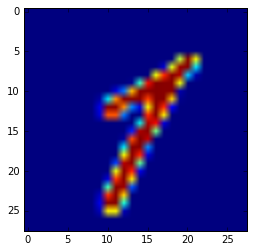

In [816]:
## look at incorrect predictions
look_at = misses[random.choice(range(len(misses)))]
print look_at
print 'Label:', np.argmax(valid_labels[look_at])
print 'Predict:', np.argmax(ypred_valid[look_at])
plt.imshow(valid_dataset[look_at].reshape((28,28)))
plt.show()

---